In [35]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.read_csv('./data/11-26/daily_plutchik_threshold_5.csv', parse_dates=['month/day'])
df.head()

,month/day,Anger,Disgust,Fear,Joy,Sadness,Surprise,Trust,Anticipation
0,2017-05-07,0.010870,0.021739,0.086957,0.097826,0.032609,0.097826,0.652174,0.000000
1,2017-05-08,0.015785,0.019732,0.071823,0.099448,0.021310,0.105762,0.654301,0.011839
2,2017-05-09,0.018973,0.024554,0.063616,0.093750,0.035714,0.100446,0.652902,0.010045
3,2017-05-10,0.021674,0.033715,0.060205,0.099338,0.031306,0.095725,0.645394,0.012643
4,2017-05-11,0.017838,0.033578,0.055614,0.134313,0.035677,0.123820,0.597062,0.002099


In [36]:
import numpy as np
import pandas as pd

def zscore(df, col):
    col_mean = df[col].rolling(window=14, center=True).mean()
    col_std = df[col].rolling(window=14, center=True).std()
    return (df[col] - col_mean)/col_std

In [37]:
df["Anticipation Z-Score"] = zscore(df, "Anticipation")
df["Trust Z-Score"] = zscore(df, "Trust")
df["Surprise Z-Score"] = zscore(df, "Surprise")
df["Sadness Z-Score"] = zscore(df, "Sadness")
df["Joy Z-Score"] = zscore(df, "Joy")
df["Fear Z-Score"] = zscore(df, "Fear")
df["Disgust Z-Score"] = zscore(df, "Disgust")
df["Anger Z-Score"] = zscore(df, "Anger")

In [105]:
from datetime import datetime, timedelta

start_date = datetime(2017, 5, 15, 0, 0)
end_date = datetime(2017, 7, 15, 0, 0)
paris_accord_date = datetime(2017, 6, 1, 0, 0)
july_4_date = datetime(2017, 7, 4, 0, 0)
df["month/day"] = pd.to_datetime(df["month/day"])
paris_accord_df = df[(df['month/day'] >= start_date) & (df['month/day'] <= end_date)]
paris_accord_df.head()

,month/day,Anger,Disgust,Fear,Joy,Sadness,Surprise,Trust,Anticipation,Anticipation Z-Score,Trust Z-Score,Surprise Z-Score,Sadness Z-Score,Joy Z-Score,Fear Z-Score,Disgust Z-Score,Anger Z-Score
8,2017-05-15,0.036745,0.034121,0.062992,0.125984,0.026247,0.110236,0.593176,0.010499,0.129850,0.010891,-0.787899,-0.381476,-0.035409,-0.000351,1.211811,2.469100
9,2017-05-16,0.012351,0.012134,0.057205,0.099892,0.020585,0.152763,0.639220,0.005850,-0.882214,0.837601,0.217486,-1.335029,-0.561359,-0.344041,-1.054657,-0.477652
10,2017-05-17,0.010534,0.011731,0.067513,0.107972,0.025138,0.193440,0.576730,0.006943,-0.525540,-0.098265,1.316717,-0.394809,-0.393333,0.355443,-1.114069,-0.619991
11,2017-05-18,0.016096,0.016505,0.048015,0.102578,0.030146,0.172691,0.607830,0.006138,-0.510240,0.491361,0.589213,0.589801,-0.539221,-1.122734,-0.633833,0.156411
12,2017-05-19,0.009538,0.012923,0.080000,0.096923,0.024000,0.171385,0.593231,0.012000,0.617683,0.326464,0.532055,-0.330691,-0.685262,1.046764,-0.915783,-0.624350


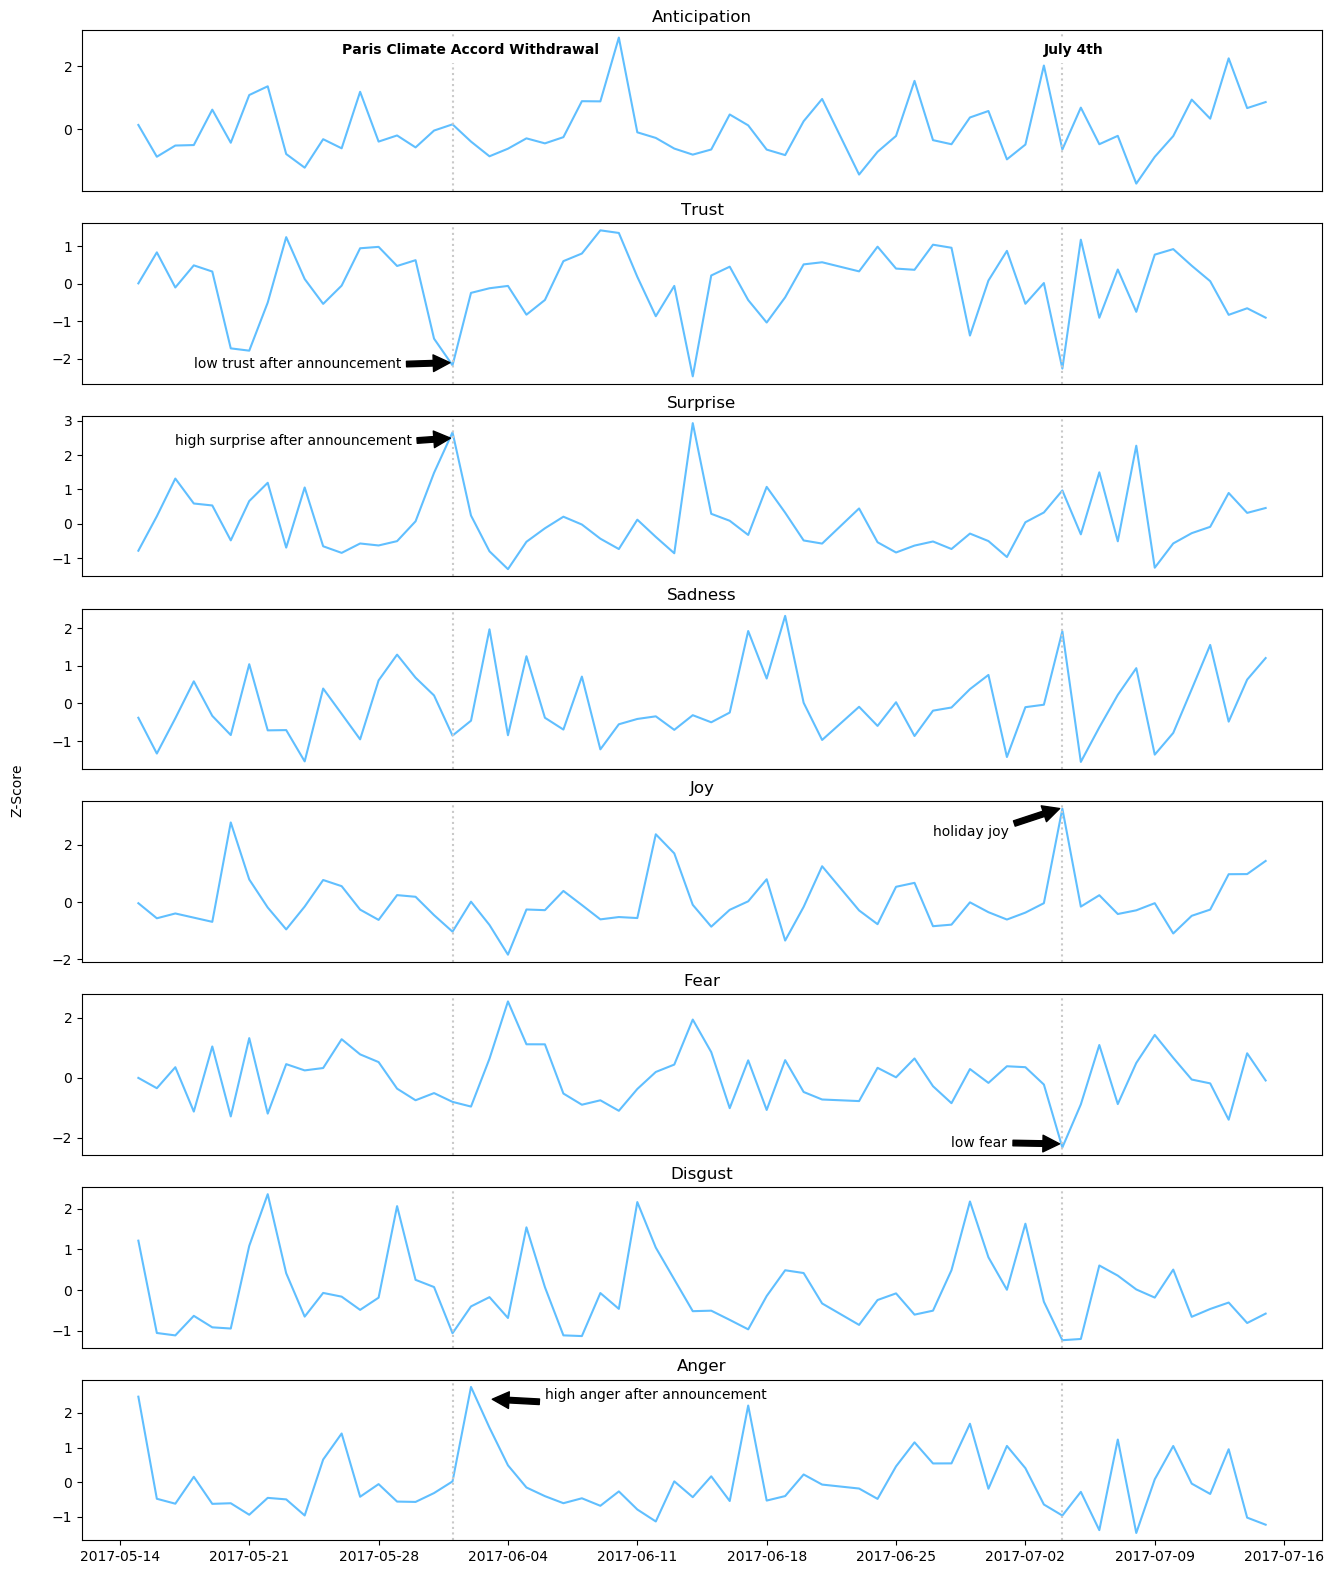

In [151]:
def add_sub_plot(num, title, ticksOff, annotation=None, X=None, Y=None, textX=None, textY=None):
    ax = plt.subplot(num, title=title)
    plt.plot('month/day', title + ' Z-Score', data=paris_accord_df, color='#60bfff')
    plt.axvline(x=paris_accord_date, color='#c9c9c9', ls='dotted')
    plt.axvline(x=july_4_date, color='#c9c9c9', ls='dotted')
    if title == 'Anticipation':
        ax.text(paris_accord_date-timedelta(6), 2.4, 'Paris Climate Accord Withdrawal', fontsize=10,
                fontweight='semibold', backgroundColor='w')
        ax.text(july_4_date-timedelta(1), 2.4, 'July 4th', fontsize=10, backgroundColor='w', fontweight='semibold')
    if ticksOff:
        plt.setp(ax.get_xticklabels(), visible=False)
        ax.tick_params(bottom="off")
    if annotation:
        ax.annotate(annotation, xy = (X, Y), xytext = (textX, textY), arrowprops=dict(facecolor='black', shrink=0.05))

fig = plt.figure(num=None, figsize=(16,20), dpi=100, facecolor='w', edgecolor='k')
add_sub_plot(811, 'Anticipation', True)
add_sub_plot(812, 'Trust', True, 'low trust after announcement', paris_accord_date, -2.1, paris_accord_date-timedelta(14), -2.25)
add_sub_plot(813, 'Surprise', True, 'high surprise after announcement', paris_accord_date, 2.5, paris_accord_date-timedelta(15), 2.3)
add_sub_plot(814, 'Sadness', True)
add_sub_plot(815, 'Joy', True, 'holiday joy', july_4_date, 3.3, july_4_date-timedelta(7), 2.3)
add_sub_plot(816, 'Fear', True, 'low fear', july_4_date, -2.2, july_4_date-timedelta(6), -2.3)
add_sub_plot(817, 'Disgust', True)
add_sub_plot(818, 'Anger', False, 'high anger after announcement', paris_accord_date+timedelta(2), 2.4, paris_accord_date+timedelta(5), 2.4)
fig.text(0.08, 0.5, 'Z-Score', va='center', rotation='vertical')

plt.savefig('intervention_analyses.png')
plt.show()